In [21]:
import matplotlib.pyplot as plt

import data_containers as dc
import traj_planner as tj

from importlib import reload 
reload(dc)
reload(tj)

<module 'traj_planner' from '/home/alessandro/repos/drone_flightplans/traj_planner.py'>

In [22]:
site=dc.Site("./coords/site.json")
site.set_origin()

planner = tj.TrajectoryPlanner(site)

In [25]:
poi_enu = site.geodetic_to_enu(site.origin)

trajectory = planner.new_arc_trajectory_202412(
    nominal_poi = poi_enu, #poi with respect to which we compute the center of the arc
    nominal_az= 180,
    nominal_el= 47,
    nominal_srange= 500,
    # actual POI with respect to which we move
    poi = site.telescopes["class2"].enu,
    delta_el= 10,
    num_steps_el= 5,
)
trajectory.plot_boresight=True

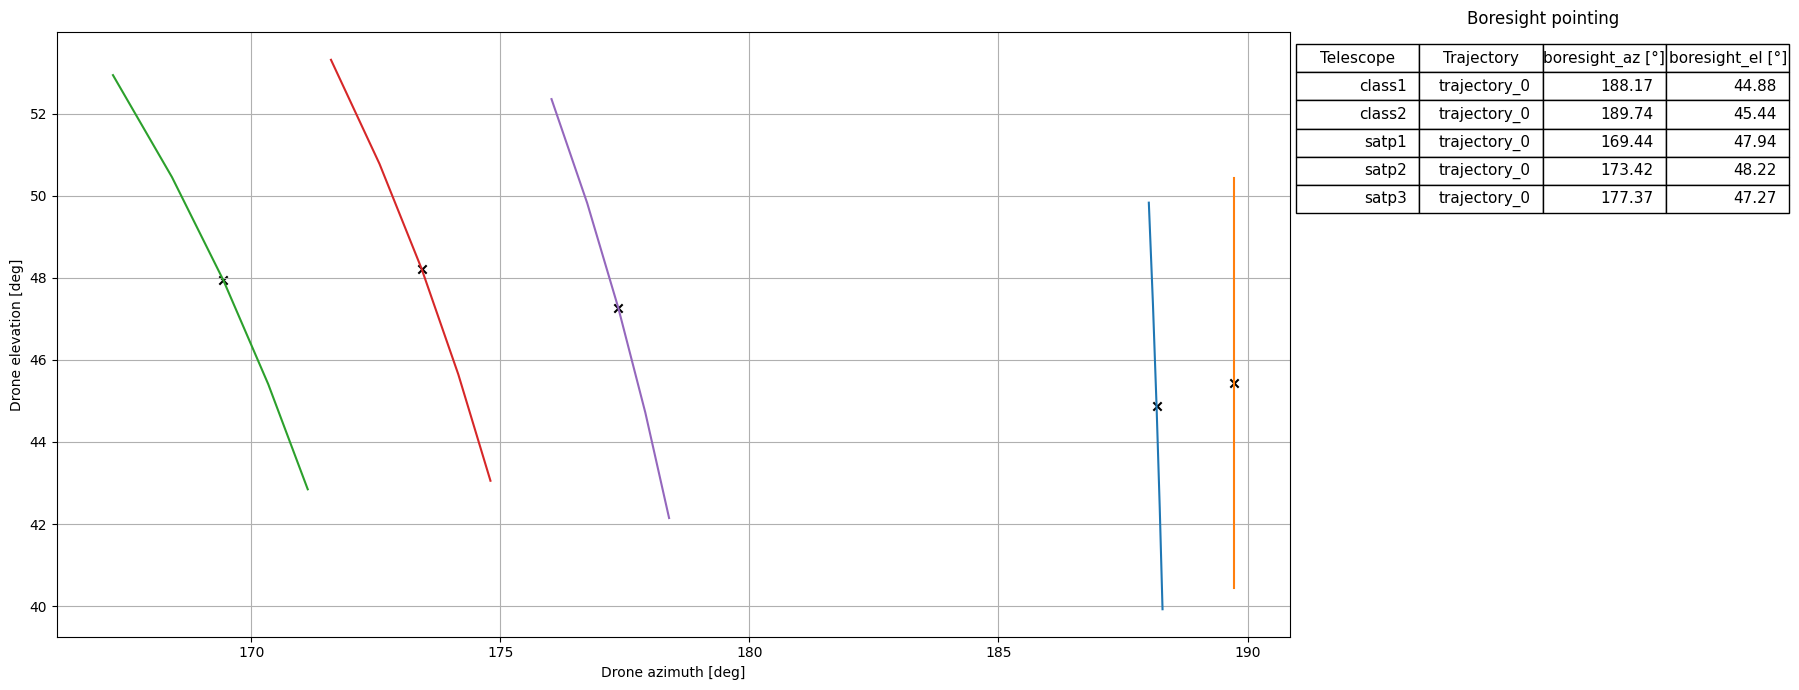

In [26]:
planner.plot_trajectories(trajectory, boresight_table=True)

In [27]:
import utils.qgc_utils as qgc
import trajectory_io as io

reload(qgc)
reload(io)

<module 'trajectory_io' from '/home/alessandro/repos/drone_flightplans/trajectory_io.py'>

In [28]:
mission = io.export_mission_qgc(trajectory, 10, 1.5, 5, savepath="outputs/load_test.plan", safety_waypoints="south", fence=True)

In [29]:
mission = io.export_mission_litchi(trajectory, 10, 1.5, 5, savepath="outputs/load_test.csv", safety_waypoints="south")

In [30]:
mission = io.export_mission_mp(trajectory, 10, 1.5, 5, savepath="outputs/load_test.waypoints", safety_waypoints="south")

In [31]:
site=dc.Site("./coords/site.json")
site.set_origin()
barycenter_enu = site.geodetic_to_enu(site.compute_barycenter())

planner = tj.TrajectoryPlanner(site)

/home/alessandro/repos/drone_flightplans/data_containers.py:132: UserWarning: No origin provided: assuming the barycenter of all telescopes as origin.
  geodetic = self.compute_barycenter()


/home/alessandro/repos/drone_flightplans/traj_planner.py:186: UserWarning: Plotting table with more than 20 entries.
Plot might be malformed.
  warnings.warn("Plotting table with more than 20 entries.\nPlot might be malformed.", UserWarning)


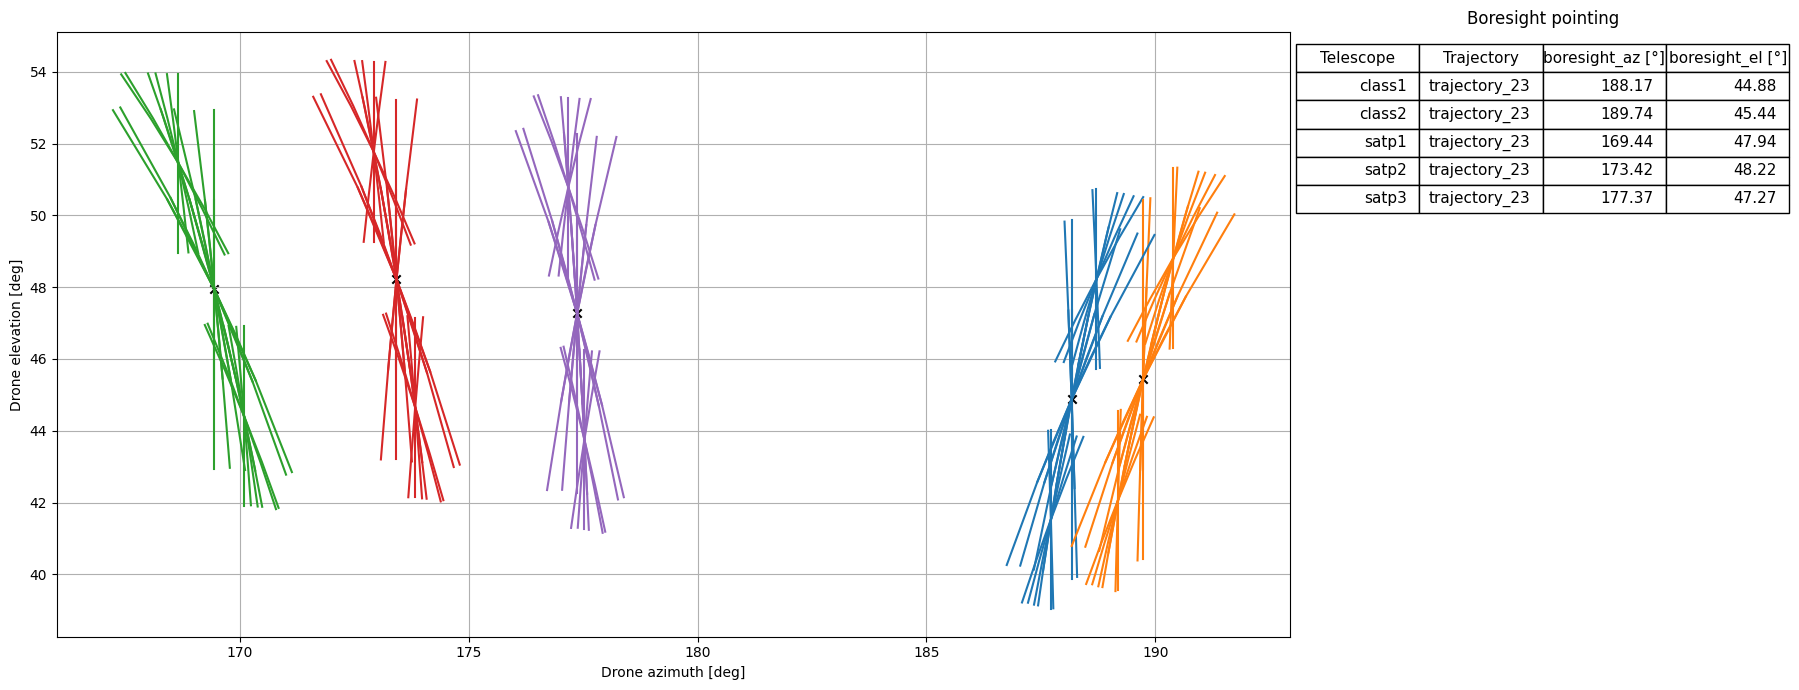

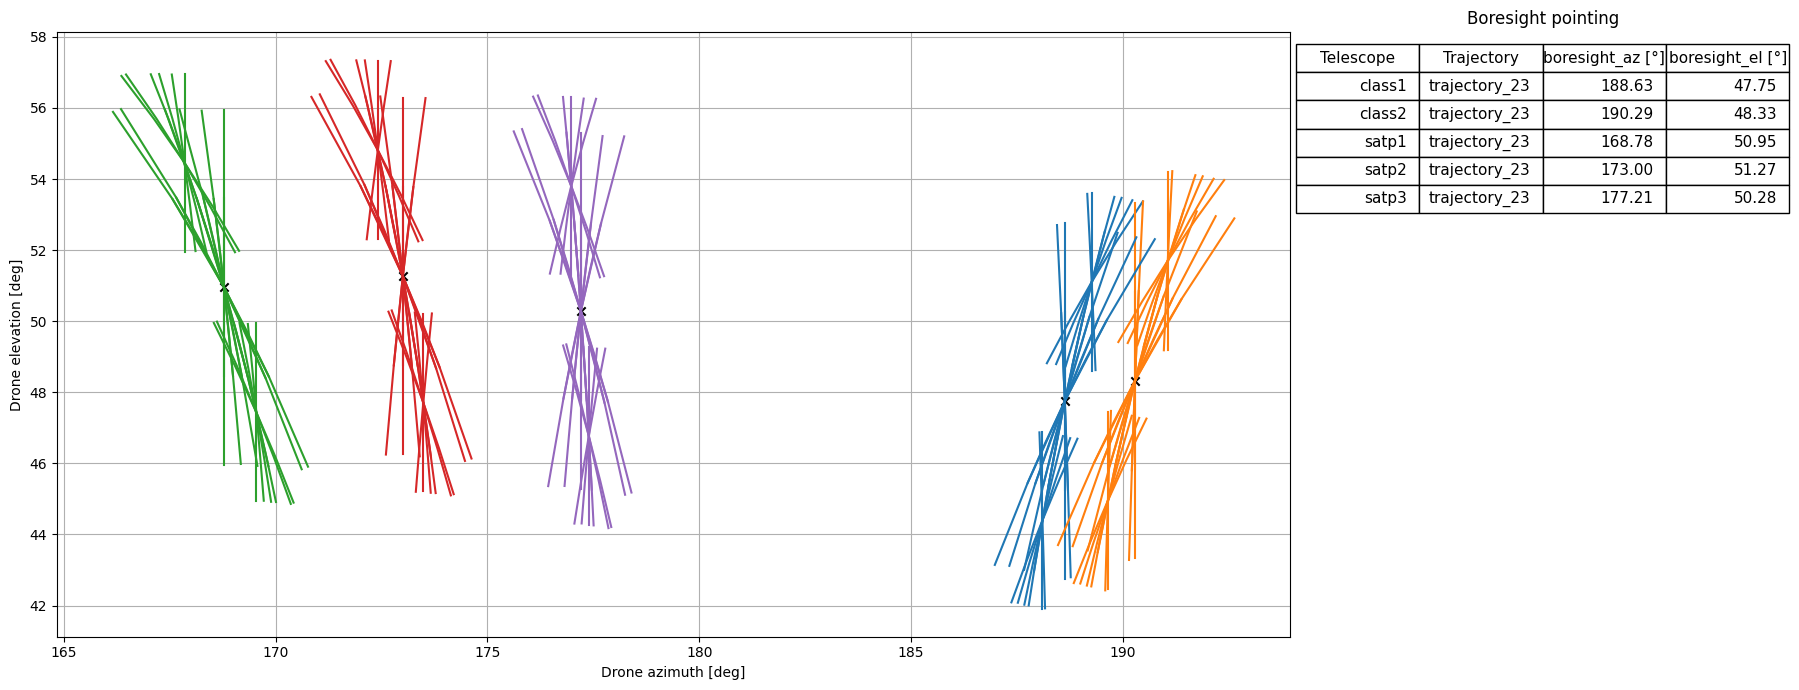

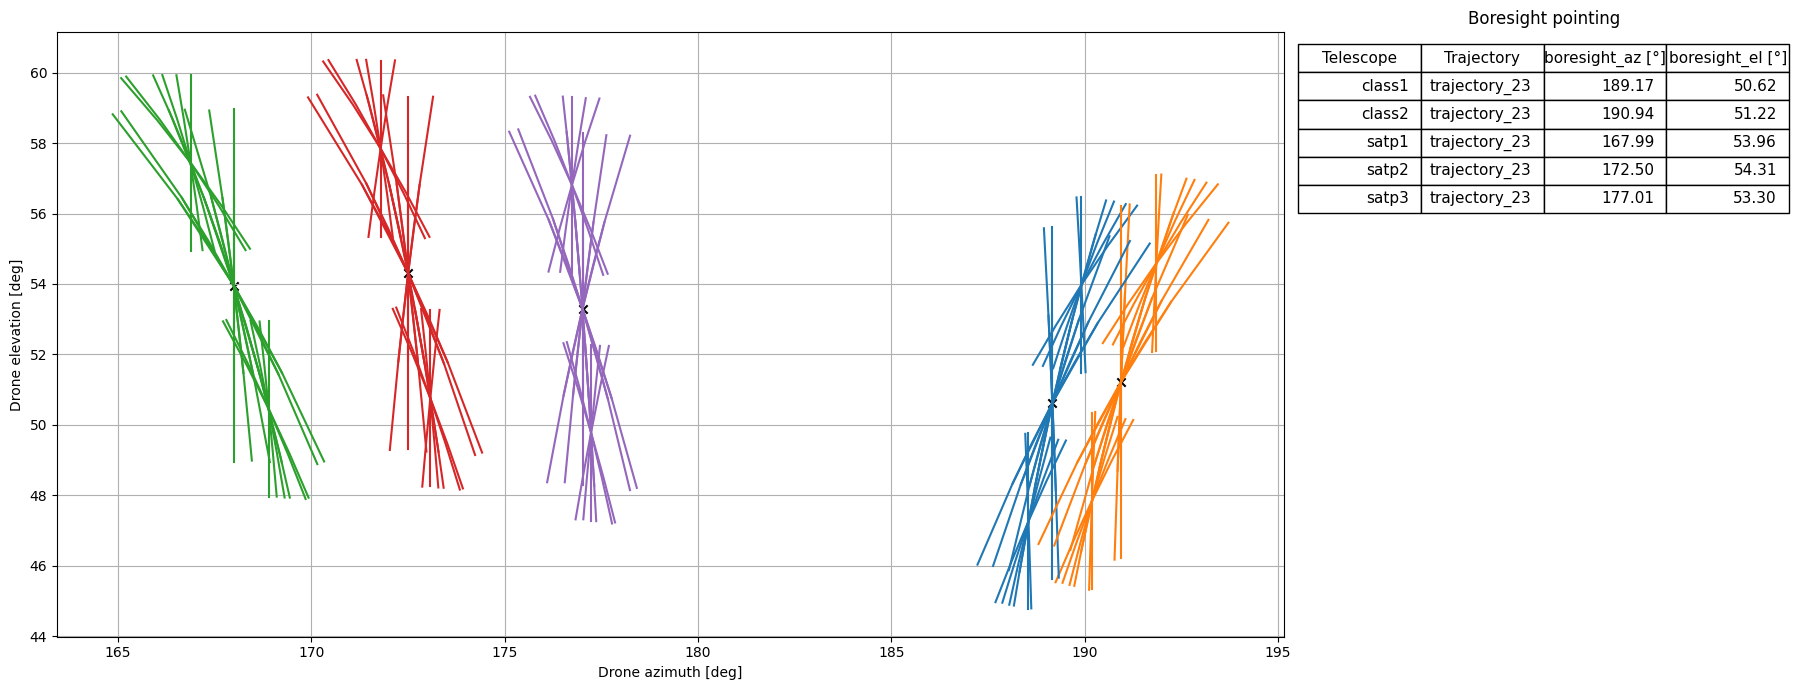

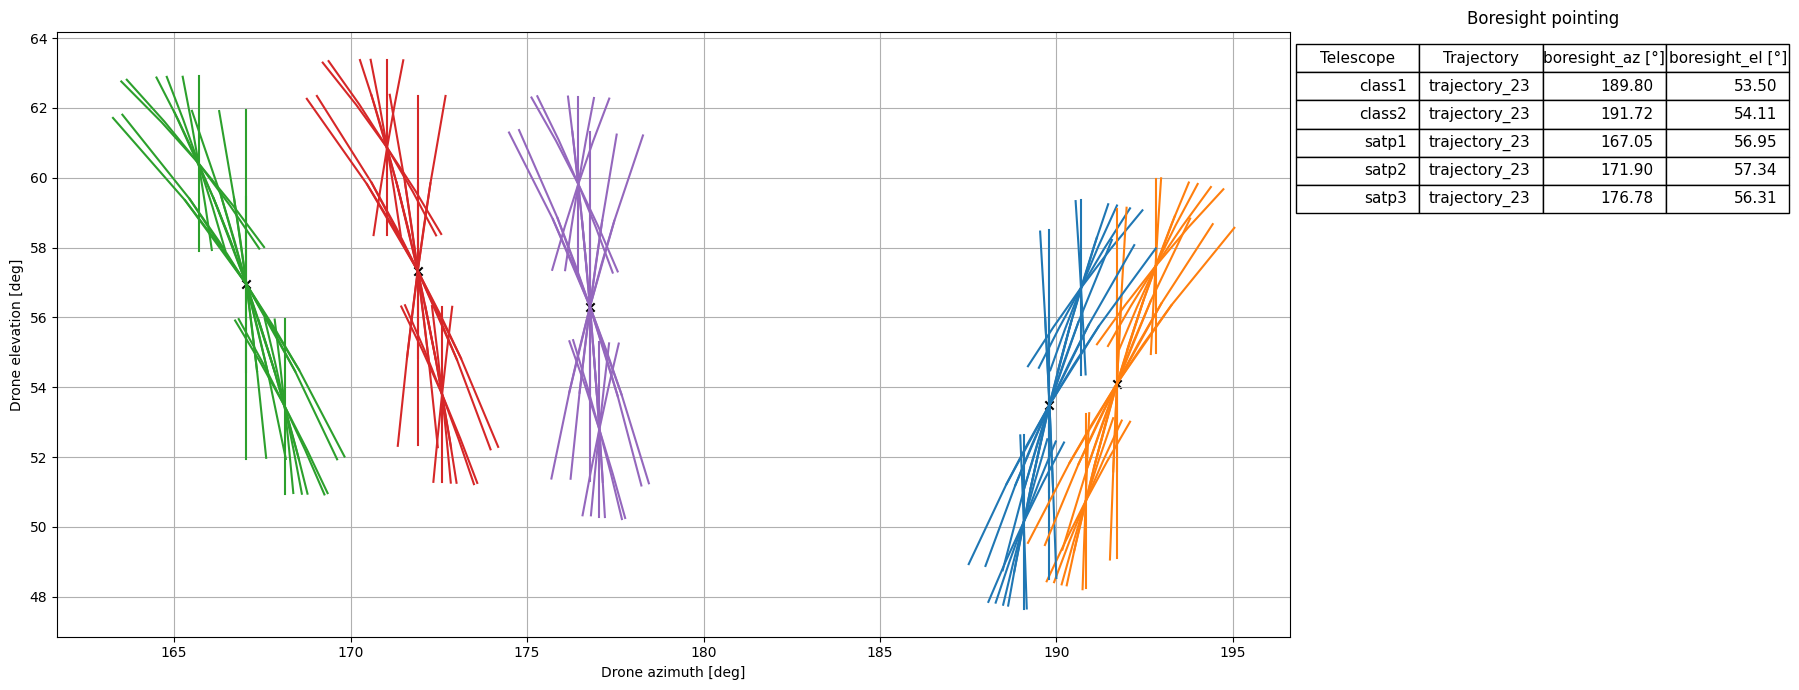

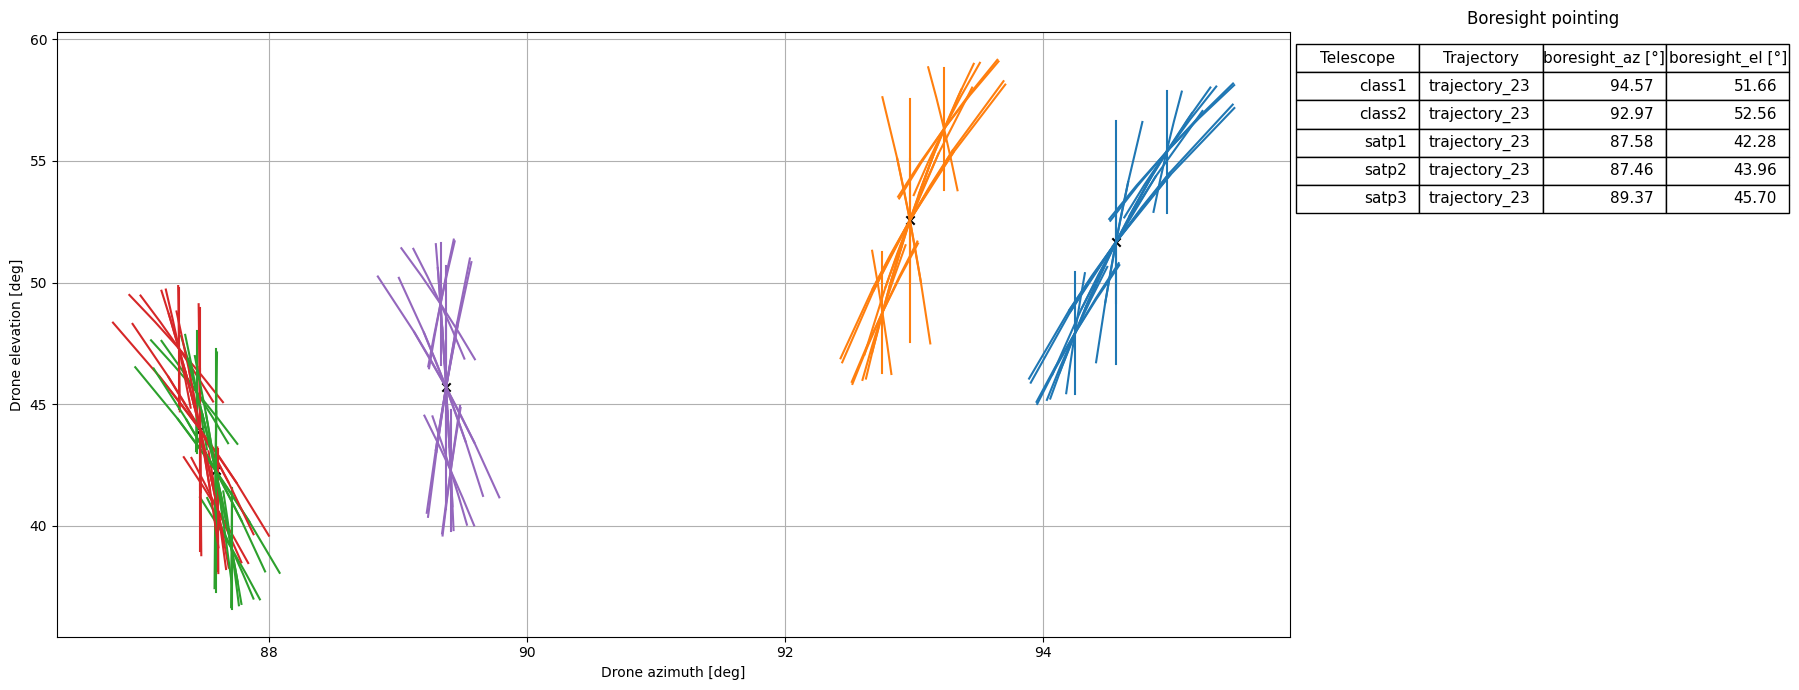

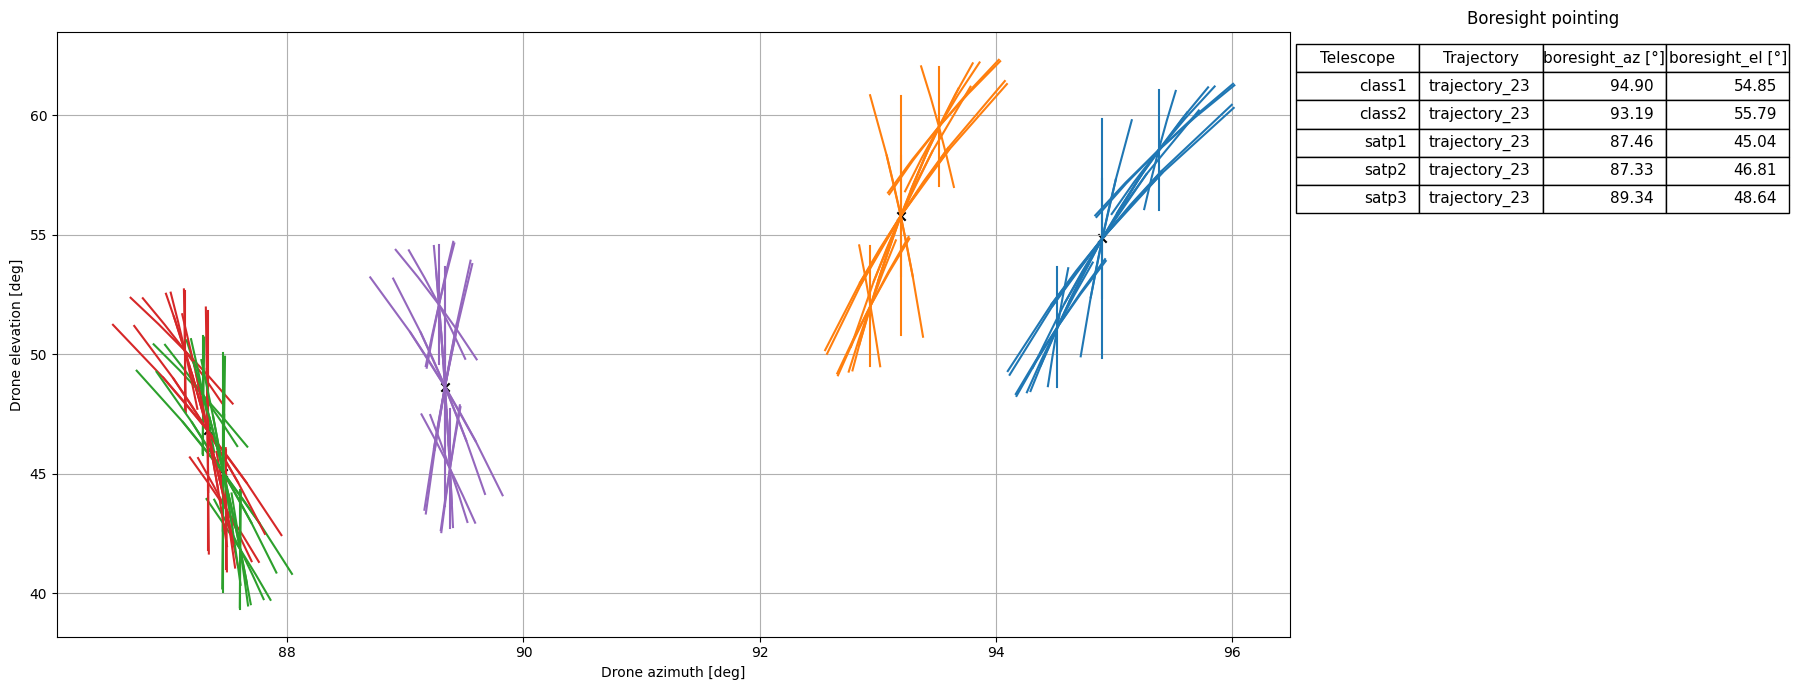

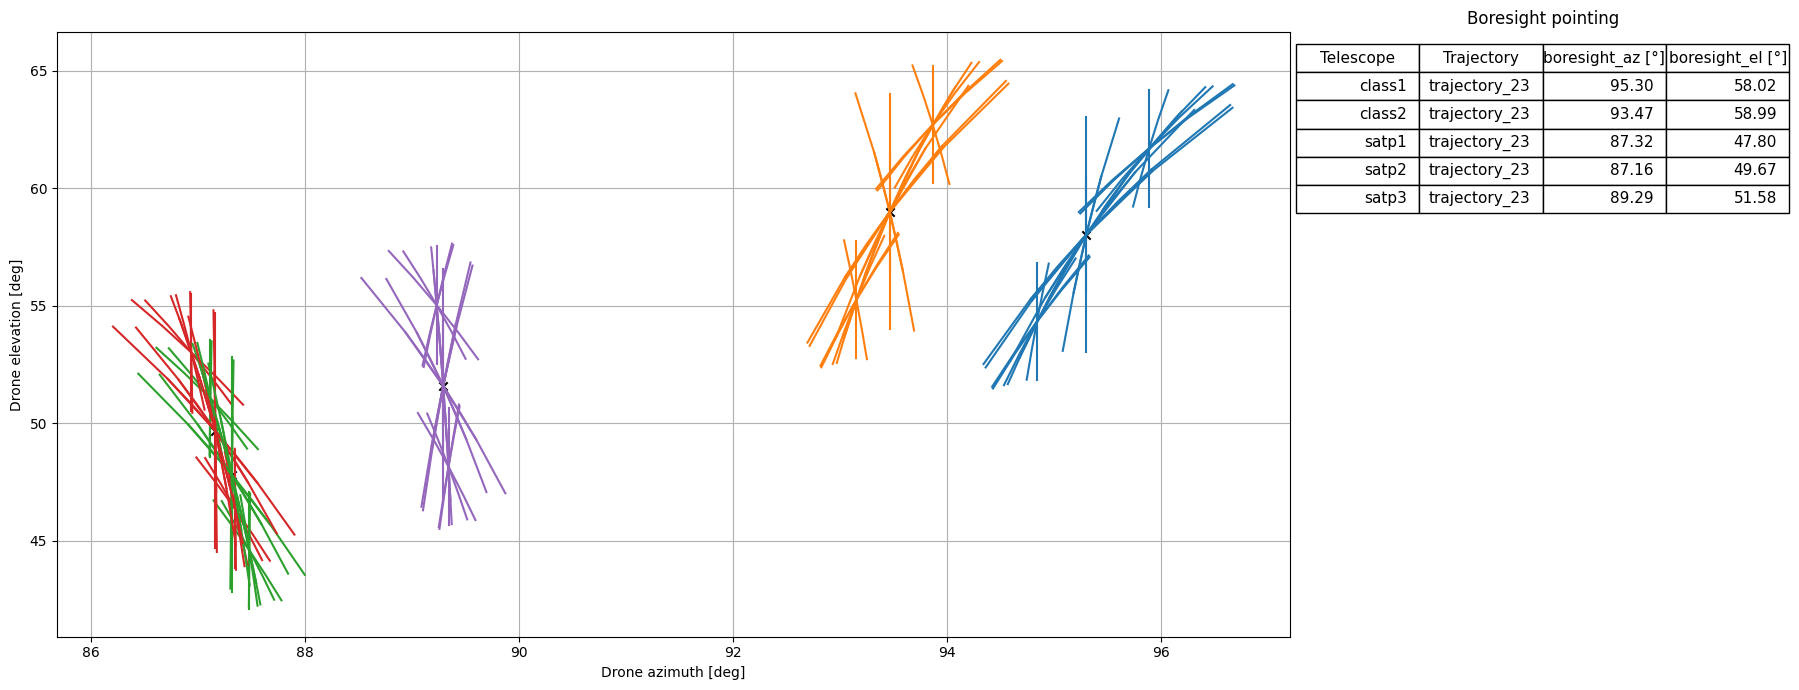

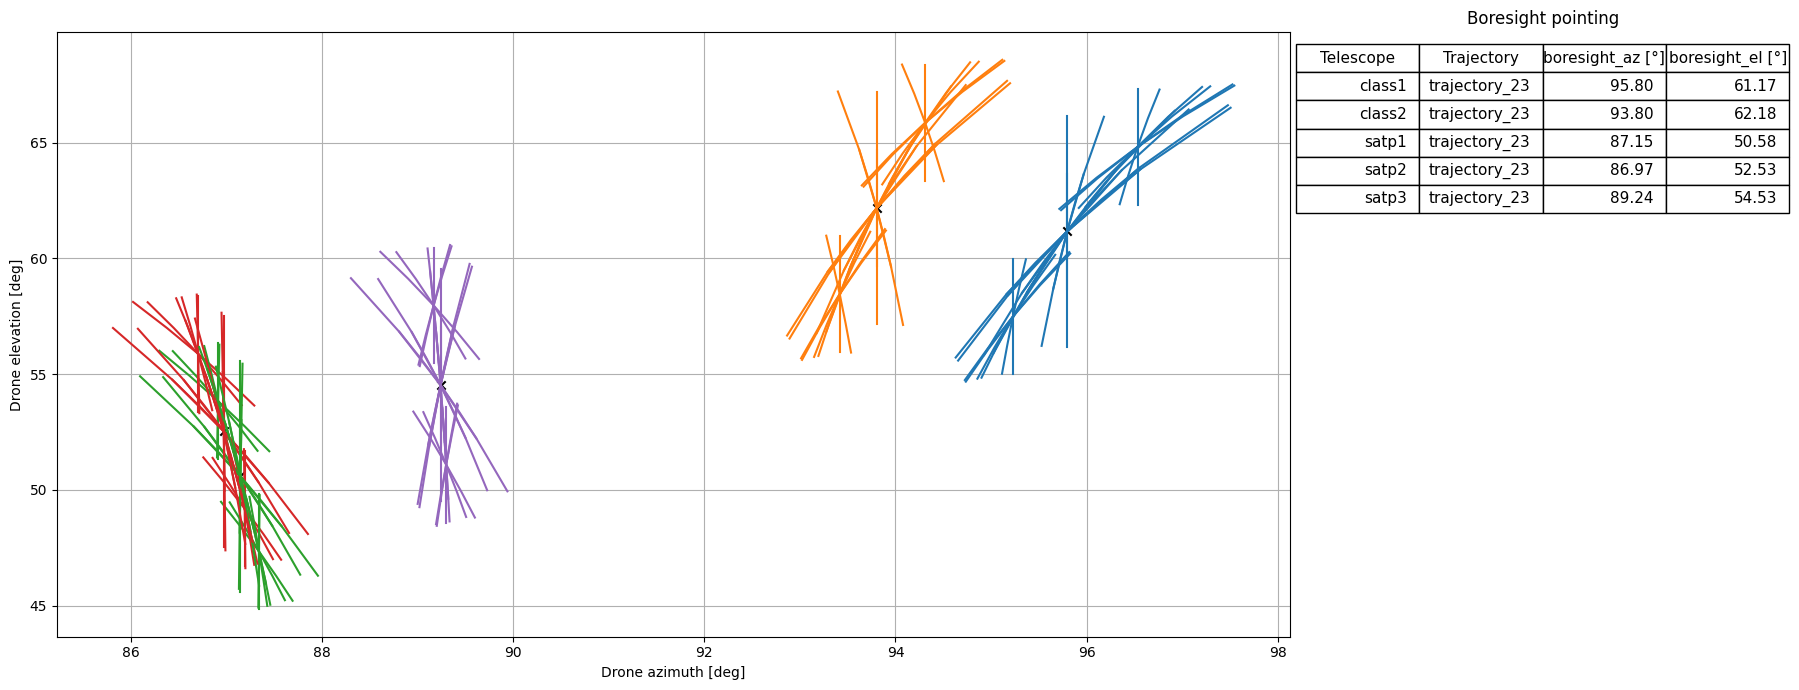

In [32]:
#nominal flights

azs = [180, 90]
els = [47, 50, 53, 56]
srange=500
secs = ["mid", "top", "bott", "full"]
pois = ["class1", "class2", "satp1", "satp2", "satp3", "barycenter"]


for az in azs:
    for el in els:

        trajectories=[]
        for sec in secs:
            for poi_name in pois:

                if poi_name=="barycenter":
                    poi=barycenter_enu
                else:
                    poi = site.telescopes[poi_name].enu

                if sec =="full":
                    delta_el=10
                    el_shift=0
                elif sec=="mid":
                    delta_el=5
                    el_shift=0
                elif sec=="top":
                    delta_el=5
                    el_shift= 3.5
                elif sec=="bott":
                    delta_el=5
                    el_shift= -3.5
                
                trajectory = planner.new_arc_trajectory_202412(
                    nominal_poi = barycenter_enu, #poi with respect to which we compute the center of the arc
                    nominal_az= az,
                    nominal_el= el+el_shift,
                    nominal_srange= srange,
                    # actual POI with respect to which we move
                    poi = poi,
                    delta_el= delta_el,
                    num_steps_el= 5,
                )
                if sec=="full" and poi_name=="barycenter":
                    trajectory.plot_boresight=True
                else:
                    trajectory.plot_boresight=False
                trajectories.append(trajectory)

                if az==0:
                    safety = "south" if az==0
                io.export_mission_qgc(trajectory, move_speed=10, scan_speed=1.5, n_repeat=5, savepath="outputs/load_test.plan", safety_waypoints="south", fence=True)
                io.export_mission_litchi(trajectory, move_speed=10, scan_speed=1.5, n_repeat=5, savepath="outputs/load_test.csv", safety_waypoints="south")
                io.export_mission_mp(trajectory, move_speed=10, scan_speed=1.5, n_repeat=5, savepath="outputs/load_test.waypoints", safety_waypoints="south")
        planner.plot_trajectories(trajectories, boresight_table=True)
    
                